## Mid-Career Salary Analysis: NWC, OR/WA
### Jack Boydell | Paul McSlarrow

Importing the necessary packages.

In [338]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import bs4
import requests
import json

from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as MSE

### Webscraping

Selecting the necessary information for all bachelor-degree awarding schools in Oregon while also renaming columns.

In [339]:
salary_html_oregon = requests.get('https://www.payscale.com/college-salary-report/best-schools-by-state/bachelors/oregon').text
df_oregon = pd.read_html(salary_html_oregon)[0]
cols = ['Rank by Mid-Career Pay', 'School Name', 'School Type', 'Early Career Pay($)', 'Mid-Career Pay($)', '% High Meaning', '% STEM degrees']
df_oregon.columns = cols
df_oregon.head(3) # looking at the data will need to use some regex selection in SQL

,Rank by Mid-Career Pay,School Name,School Type,Early Career Pay($),Mid-Career Pay($),% High Meaning,% STEM degrees
0,Rank:1,School Name:Reed College,"School Type:Liberal Arts School, Private School","Early Career Pay:$61,600","Mid-Career Pay:$120,100",% High Meaning:40%,% STEM Degrees:31%
1,Rank:2,School Name:Willamette University,"School Type:Liberal Arts School, Private School","Early Career Pay:$55,600","Mid-Career Pay:$116,100",% High Meaning:53%,% STEM Degrees:13%
2,Rank:3,School Name:University of Portland,"School Type:Private School, Religious, For Spo...","Early Career Pay:$64,000","Mid-Career Pay:$112,300",% High Meaning:51%,% STEM Degrees:31%


Exporting table to a CSV file.

In [340]:
df_oregon.to_csv('/Users/jackboydell/Desktop/DATA 403/oregon_schools.csv')

Selecting the necessary information for all bachelor-degree awarding schools in Washington.

In [341]:
salary_html_wash = requests.get('https://www.payscale.com/college-salary-report/best-schools-by-state/bachelors/washington').text
df_wash = pd.read_html(salary_html_wash)[0]
cols = ['Rank by Mid-Career Pay', 'School Name', 'School Type', 'Early Career Pay', 'Mid-Career Pay', '% High Meaning', '% STEM degrees']
df_wash.columns = cols
df_wash.head(3) # looking at the data will need to use some regex selection in SQL

,Rank by Mid-Career Pay,School Name,School Type,Early Career Pay,Mid-Career Pay,% High Meaning,% STEM degrees
0,Rank:1,School Name:Seattle University,"School Type:Private School, Religious, For Spo...","Early Career Pay:$65,700","Mid-Career Pay:$121,400",% High Meaning:58%,% STEM Degrees:16%
1,Rank:1,School Name:University of Washington-Seattle C...,"School Type:Research University, For Sports Fa...","Early Career Pay:$67,400","Mid-Career Pay:$121,400",% High Meaning:52%,% STEM Degrees:37%
2,Rank:3,School Name:Whitman College,"School Type:Liberal Arts School, Private School","Early Career Pay:$59,800","Mid-Career Pay:$119,700",% High Meaning:52%,% STEM Degrees:36%


Exporting table to CSV file.

In [342]:
df_wash.to_csv('/Users/jackboydell/Desktop/DATA 403/washington_schools.csv')

## Analysis

In [343]:
NWC_schools = pd.read_csv('/Users/jackboydell/Desktop/DATA 403/NWC_schools.csv')
NWC_schools.head(20)

,school_name,rank,school_type,early_career_pay,mid_career_pay,state,per_high_meaning_int,per_stem_deg_int,private,applications,...,out_of_state_tuitiion,room_board_costs,book_costs,est_personal_spending,pct_faculty_phd,pc_faculty_terminal,stud_fac_ratio,pct_alum_donate,expend_per_stud,grad_rate
0,George Fox University,14,"Private School, Religious",55300,91300,OR,50,10,Yes,809,...,12500,4130,400,1050,53,53,13.5,22,7136,52
1,Lewis and Clark College,8,"Liberal Arts School, Private School",53900,104500,OR,57,11,Yes,2774,...,15800,4790,450,950,97,98,12.3,21,12999,69
2,Linfield University,10,"Liberal Arts School, Private School, Religious",56100,99900,OR,48,17,Yes,1561,...,13380,4210,500,900,89,91,17.8,34,8747,81
3,Pacific Lutheran University,11,"Private School, Religious",58400,106200,WA,52,15,Yes,1603,...,13312,4488,600,1516,78,78,11.0,23,9431,83
4,Pacific University,11,Private School,52000,99700,OR,64,8,Yes,943,...,14210,3994,450,1100,76,76,10.9,22,11216,42
5,University of Puget Sound,5,"Liberal Arts School, Private School",58700,116100,WA,46,18,Yes,4044,...,16230,4500,630,1800,79,86,15.0,17,11217,63
6,Whitman College,3,"Liberal Arts School, Private School",59800,119700,WA,52,36,Yes,1861,...,16670,4900,750,800,80,83,10.5,51,13198,72
7,Whitworth University,17,"Private School, Religious",54200,92700,WA,56,16,Yes,1121,...,12660,4500,678,2424,80,80,16.9,20,8328,80
8,Willamette University,2,"Liberal Arts School, Private School",55600,116100,OR,53,13,Yes,1658,...,14800,4620,400,790,91,94,13.3,37,10779,68


In [344]:
or_wash_schools = pd.read_csv('/Users/jackboydell/Desktop/DATA 403/or_wash_schools.csv')
or_wash_schools

,school_name,rank,school_type,early_career_pay,mid_career_pay,state,per_high_meaning_int,per_stem_deg_int,private,applications,...,out_of_state_tuitiion,room_board_costs,book_costs,est_personal_spending,pct_faculty_phd,pc_faculty_terminal,stud_fac_ratio,pct_alum_donate,expend_per_stud,grad_rate
0,Central Washington University,13,State School,57300,99600,WA,49,13,No,2785.0,...,7242.0,3603.0,654.0,1416.0,67.0,89.0,18.1,0.0,6413.0,51.0
1,Gonzaga University,4,"Private School, Religious, For Sports Fans",63300,117500,WA,51,19,Yes,1886.0,...,13000.0,4450.0,600.0,2400.0,78.0,90.0,14.7,32.0,9553.0,69.0
2,Lewis and Clark College,8,"Liberal Arts School, Private School",53900,104500,OR,57,11,Yes,2774.0,...,15800.0,4790.0,450.0,950.0,97.0,98.0,12.3,21.0,12999.0,69.0
3,Pacific Lutheran University,11,"Private School, Religious",58400,106200,WA,52,15,Yes,1603.0,...,13312.0,4488.0,600.0,1516.0,78.0,78.0,11.0,23.0,9431.0,83.0
4,Pacific University,11,Private School,52000,99700,OR,64,8,Yes,943.0,...,14210.0,3994.0,450.0,1100.0,76.0,76.0,10.9,22.0,11216.0,42.0
5,Reed College,1,"Liberal Arts School, Private School",61600,120100,OR,40,31,Yes,1966.0,...,19960.0,5490.0,500.0,450.0,90.0,90.0,11.8,37.0,15886.0,68.0
6,Seattle Pacific University,7,"Private School, Religious, Research University",57800,112600,WA,52,15,Yes,1183.0,...,12669.0,4875.0,600.0,1250.0,83.0,85.0,16.8,20.0,10368.0,66.0
7,Seattle University,1,"Private School, Religious, For Sports Fans",65700,121400,WA,58,16,Yes,2115.0,...,12825.0,4375.0,500.0,1500.0,85.0,85.0,12.2,16.0,10175.0,89.0
8,University of Oregon,7,"Research University, For Sports Fans, State Sc...",56000,104700,OR,47,14,No,8631.0,...,10602.0,3660.0,570.0,1530.0,79.0,87.0,19.7,13.0,8020.0,54.0
9,University of Portland,3,"Private School, Religious, For Sports Fans",64000,112300,OR,51,31,Yes,1758.0,...,12040.0,4100.0,600.0,1100.0,92.0,96.0,13.2,17.0,9060.0,72.0


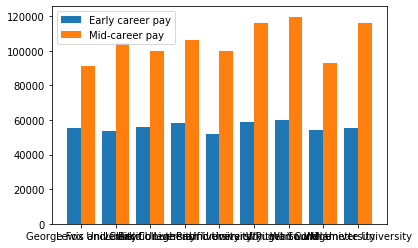

In [345]:
X_axis = np.arange(len(NWC_schools['school_name']))
  
plt.bar(X_axis - 0.2, NWC_schools['early_career_pay'], 0.4, label = 'Early career pay')
plt.bar(X_axis + 0.2, NWC_schools['mid_career_pay'], 0.4, label = 'Mid-career pay')
  
plt.xticks(X_axis, NWC_schools['school_name'])
#plt.xlabel("Groups")
#plt.ylabel("Number of Students")
#plt.title("Number of Students in each group")
plt.legend()
plt.show()

Index(['rank', 'early_career_pay', 'mid_career_pay', 'per_high_meaning_int',
       'per_stem_deg_int', 'applications', 'apps_accepted', 'new_enrollees',
       'from_top_10perc_hs', 'from_top_25perc_hs', 'fulltime_students',
       'parttime_students', 'out_of_state_tuitiion', 'room_board_costs',
       'book_costs', 'est_personal_spending', 'pct_faculty_phd',
       'pc_faculty_terminal', 'stud_fac_ratio', 'pct_alum_donate',
       'expend_per_stud', 'grad_rate'],
      dtype='object')


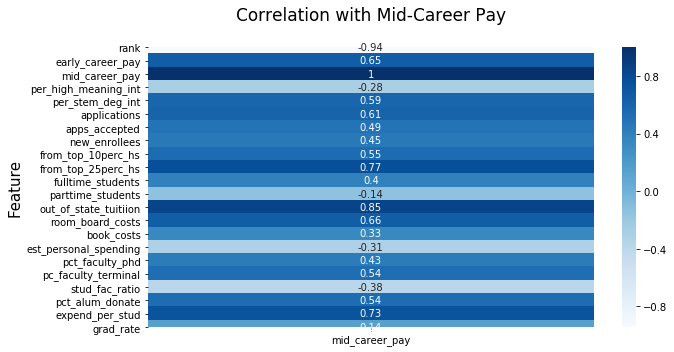

In [346]:
#Using Pearson Correlation
plt.figure(figsize=(10,5)) #(changed from (12,10))
cor = NWC_schools.corr()
response_column = pd.DataFrame(cor['mid_career_pay'])
print(response_column.index)
sns.heatmap(response_column, annot=True, cmap=plt.cm.Blues)
plt.title('Correlation with Mid-Career Pay\n', fontsize=17, y=1.08)
plt.ylabel('Feature', fontsize=15)
plt.tight_layout()
plt.show()

<Figure size 2880x1584 with 0 Axes>

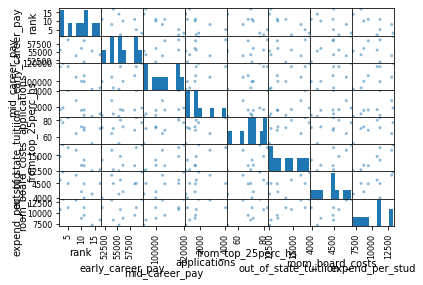

In [347]:
cor_target = abs(cor["mid_career_pay"]) # absolute value
relevant_features = cor_target[cor_target>0.6]
relevant_features = list(relevant_features.index)

plt.figure(figsize=(40,22))
_ = pd.plotting.scatter_matrix(NWC_schools[relevant_features])
plt.show()

Text(0, 0.5, '')

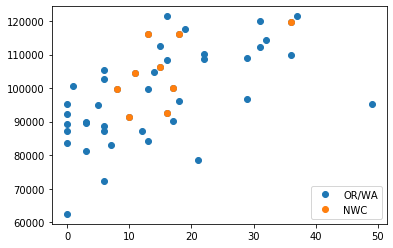

In [348]:
plt.plot('per_stem_deg_int', 'mid_career_pay', data=or_wash_schools, label='OR/WA', marker='o', ls='none')
plt.plot('per_stem_deg_int', 'mid_career_pay', data=NWC_schools, label='NWC', marker='o', ls='none')

plt.legend(loc='lower right')
plt.title('')
plt.xlabel('')
plt.ylabel('')

In [349]:
NWC_schools.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 26 columns):
school_name              9 non-null object
rank                     9 non-null int64
school_type              9 non-null object
early_career_pay         9 non-null int64
mid_career_pay           9 non-null int64
state                    9 non-null object
per_high_meaning_int     9 non-null int64
per_stem_deg_int         9 non-null int64
private                  9 non-null object
applications             9 non-null int64
apps_accepted            9 non-null int64
new_enrollees            9 non-null int64
from_top_10perc_hs       9 non-null int64
from_top_25perc_hs       9 non-null int64
fulltime_students        9 non-null int64
parttime_students        9 non-null int64
out_of_state_tuitiion    9 non-null int64
room_board_costs         9 non-null int64
book_costs               9 non-null int64
est_personal_spending    9 non-null int64
pct_faculty_phd          9 non-null int64
pc_faculty_te

(array([1., 0., 1., 0., 1., 2., 2., 8., 3., 5., 4., 1., 4., 5., 3., 3., 4.]),
 array([ 62500.        ,  65964.70588235,  69429.41176471,  72894.11764706,
         76358.82352941,  79823.52941176,  83288.23529412,  86752.94117647,
         90217.64705882,  93682.35294118,  97147.05882353, 100611.76470588,
        104076.47058824, 107541.17647059, 111005.88235294, 114470.58823529,
        117935.29411765, 121400.        ]),
 <a list of 17 Patch objects>)

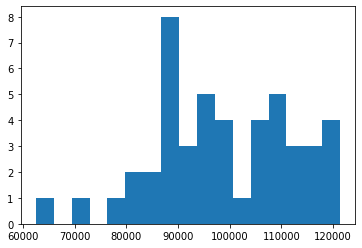

In [350]:
plt.hist(or_wash_schools['mid_career_pay'], bins=17)

Text(0.5, 1.0, 'Mid-Career Pay by State\n')

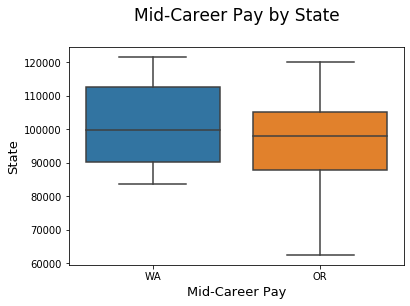

In [351]:
sns.boxplot(x='state', y='mid_career_pay', data=or_wash_schools)
or_med = or_wash_schools[or_wash_schools["state"] == "OR"]["mid_career_pay"].quantile(0.5)
wa_med = or_wash_schools[or_wash_schools["state"] == "WA"]["mid_career_pay"].quantile(0.5)
#plt.text.Annotation(f'OR: med = {or_med}', 65000, s=1 )
# plt
plt.xlabel('Mid-Career Pay', fontsize=13)
plt.ylabel('State', fontsize=13)
plt.title('Mid-Career Pay by State\n', fontsize=17)

In [352]:
print(list(or_wash_schools[or_wash_schools['state'] == 'OR']['mid_career_pay']))
print(list(or_wash_schools[or_wash_schools['state'] == 'WA']['mid_career_pay']))

[104500, 99700, 120100, 104700, 112300, 116100, 91300, 99900, 100600, 95200, 96200, 83100, 62500, 110000, 78700, 89600, 81200, 88800, 72300, 105400, 87300, 109000]
[99600, 117500, 106200, 112600, 121400, 116100, 110100, 108300, 119700, 92700, 92300, 87300, 94900, 84100, 121400, 95200, 90000, 102700, 108800, 90200, 83600, 96600, 114200, 87300, 89300]


In [353]:
def create_category(df, old_col_name, new_col_name, bin_cond):
    '''
    df: (Pandas DataFrame)
    old_col_name: (name of numerical column to convert to category)
    new_col_name: (name of the newly created category)
    '''
    lst = [] 
    for value in df[old_col_name]:
        if value == bin_cond:
            lst.append(1)
        else:
            lst.append(0)
            
    df = pd.concat([df, pd.Series(lst, name=new_col_name)], axis=1)
    df[new_col_name] = df[new_col_name].astype('category')
    
    return df

In [354]:
# fitting some kind of regression for NCW schools, extending to Oregon and Washington
NWC_schools = create_category(NWC_schools, 'private', 'enc_private', 'Yes')
NWC_schools = create_category(NWC_schools, 'state', 'enc_state', 'OR')


to_drop = ['mid_career_pay', 'early_career_pay', 'school_name','school_type', 'private', 'state']
X = NWC_schools.drop(to_drop, axis=1)
y = NWC_schools['mid_career_pay']

In [355]:
or_wash_schools = create_category(or_wash_schools, 'private', 'enc_private', 'Yes')
or_wash_schools = create_category(or_wash_schools, 'state', 'enc_state', 'OR')

non_null = or_wash_schools.dropna()

In [356]:
keys = list(X.columns.values)
i1 = non_null.set_index(keys).index
i2 = X.set_index(keys).index
X_PRE = non_null[~i1.isin(i2)]

X_train = X_PRE.drop(to_drop, axis=1) # there are null values
y_train = X_PRE['mid_career_pay']

In [357]:
X_train = X_train.values
y_train = y_train.values
X = X.values
y = y.values

Fitting a Lasso Regression predictor with mid-career salary set as the target variable.

In [358]:
lasso = Lasso(alpha=0.25)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X)
print(f'R2 Score: {r2_score(y, y_pred)}')
print(f'RMSE: {np.sqrt(MSE(y, y_pred))}') # graph RMSE vs R2 

R2 Score: 0.7138250994827675
RMSE: 5220.538826291255
